# Aggregations: Min, Max, and Everything In Between

When faced with large amounts of data, summary statistics are useful to first calculate:

Mean

Standard Deviation

As well as the sum, product, median, min, max etc...

## Summing the Values in an Array

Consider computing the sum of all values in an array. *Python* itself can do this using the built-in `sum` function

In [2]:
import numpy as np

In [17]:
L = np.random.random(100)
print(L)
sum(L)

[0.8692327  0.52318882 0.23838106 0.09583998 0.53017018 0.21935611
 0.23110227 0.09113421 0.52983548 0.50155933 0.92751921 0.0708324
 0.38478745 0.2041464  0.63505574 0.31868033 0.80185785 0.72689133
 0.46786489 0.25712597 0.22140333 0.46753076 0.95561369 0.3695079
 0.09131885 0.73658204 0.39173207 0.96029429 0.21883666 0.57362115
 0.92248169 0.81342367 0.18315584 0.38813939 0.86979765 0.37154428
 0.91910859 0.19126921 0.75024288 0.69840037 0.51516287 0.77985524
 0.84837028 0.88347162 0.87707479 0.87245886 0.32733371 0.32378645
 0.60799297 0.76921133 0.44987621 0.74381298 0.09368146 0.31938362
 0.78047025 0.80408048 0.26527626 0.4004237  0.7454391  0.41719781
 0.08614407 0.48358757 0.97020433 0.86607338 0.57926157 0.21036318
 0.29227501 0.18829537 0.19916673 0.18804863 0.65359449 0.96103696
 0.19366227 0.004019   0.71158257 0.67649865 0.79034104 0.94205754
 0.07985293 0.82589429 0.55538706 0.77282456 0.05098478 0.98295873
 0.78434213 0.99577127 0.7250292  0.36887608 0.70698237 0.283014

51.66790211205794

In [ ]:
# similar to NumPy's syntax

np.sum(L)

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [18]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

47.1 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
251 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Minimum and Maximum

*Python* has built-in min and max functions, used to find the minimum value and maximum value of any given array:

In [19]:
%timeit min(big_array), max(big_array)

63.4 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit np.min(big_array), np.max(big_array)

490 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
np.min(big_array), np.max(big_array)

(2.6893013055362402e-06, 0.9999963209339819)

In [24]:
# more convenient syntax in NumPy

print(big_array.min(), big_array.max(), big_array.sum())

2.6893013055362402e-06 0.9999963209339819 500080.4998746785


## Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column e.g:

In [25]:
M = np.random.random((3, 4))
print(M)

[[0.74229512 0.49491176 0.01201728 0.83565784]
 [0.72911455 0.26412113 0.80595128 0.84426498]
 [0.65642945 0.33270641 0.68787962 0.8754472 ]]


In [26]:
# By default, each NumPy aggregation function will return aggregate over entire array
M.sum()

7.280796620831143

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. 

For example, we can find the minimum value within each column by specifying `axis=0`:

In [27]:
M

array([[0.74229512, 0.49491176, 0.01201728, 0.83565784],
       [0.72911455, 0.26412113, 0.80595128, 0.84426498],
       [0.65642945, 0.33270641, 0.68787962, 0.8754472 ]])

In [32]:
M.min(axis=0)

array([0.65642945, 0.26412113, 0.01201728, 0.83565784])

In [38]:
# max in each row
M.max(axis=1)

array([0.83565784, 0.84426498, 0.8754472 ])

In [40]:
N = np.random.random((3, 3))
N.max(axis=0)

array([0.84579759, 0.72708319, 0.97465131])

In [44]:
N.min(axis=1)

array([0.34094031, 0.0186571 , 0.30080211])

### Other aggregation functions

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

In [50]:
print(np.any([0,5,6,78,10]))
print(np.any([0,0]))
print(np.any([1,1]))

# OR


True
False
True


In [49]:
print(np.all([0,5,6,78,10]))
print(np.all([0,0]))
print(np.all([1,1]))

# AND


False
False
True


# Example: What is the average networth of the world's richest people?

Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the networth of the top 100 richest people. 

In [54]:
#csv from https://github.com/richard512/Little-Big-Data/blob/master/top100-richest-people.csv
!head -4 top100-richest-people.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
import pandas as pd
data = pd.read_csv('C:/Users/kris/OneDrive/Desktop/top100-richest-people.csv')
networth = np.array(data['networth'])
print(networth)

[86000000000 71000000000 70200000000 70000000000 68000000000 50000000000
 50000000000 48000000000 46000000000 43500000000 43000000000 42500000000
 41000000000 40000000000 38500000000 37200000000 37100000000 37100000000
 37000000000 36700000000 36500000000 36000000000 34000000000 30000000000
 30000000000 28900000000 28500000000 28050000000 26900000000 25900000000
 24400000000 24400000000 24400000000 23800000000 23400000000 23000000000
 23000000000 23000000000 22800000000 22500000000 21300000000 21200000000
 21000000000 21000000000 20100000000 20100000000 20000000000 20000000000
 20000000000 20000000000 19700000000 19600000000 19500000000 19400000000
 19300000000 19100000000 18200000000 18000000000 18000000000 17500000000
 17300000000 17300000000 17100000000 17100000000 16600000000 16500000000
 16200000000 16200000000 16200000000 15800000000 15700000000 15500000000
 15500000000 15500000000 15400000000 15200000000 15200000000 14900000000
 14800000000 14800000000 14700000000 14500000000 14

In [58]:
print(data)

    rank                  name   networthtext     networth nationality  \
0      1            Bill Gates    $86 Billion  86000000000    American   
1      2  Amancio Ortega Gaona    $71 Billion  71000000000     Spanish   
2      3        Warren Buffett  $70.2 Billion  70200000000    American   
3      4        Vladimir Putin    $70 Billion  70000000000     Russian   
4      5      Carlos Slim Helu    $68 Billion  68000000000     Mexican   
..   ...                   ...            ...          ...         ...   
95    96            Shiv Nadar  $13.8 Billion  13800000000      Indian   
96    97          John Paulson  $13.7 Billion  13700000000    American   
97    98           Harold Hamm  $13.7 Billion  13700000000    American   
98    99           Zhou Qunfei  $13.6 Billion  13600000000     Chinese   
99   100     Anne Cox Chambers  $13.5 Billion  13500000000    American   

               company         whattheydo  \
0            microsoft  tech conglomerate   
1              indite

In [53]:
print("Mean networth:       ", networth.mean())
print("Standard deviation:", networth.std())
print("Minimum networth:    ", networth.min())
print("Maximum networth:    ", networth.max())

Mean networth:        25255500000.0
Standard deviation: 14634939178.213213
Minimum networth:     13500000000
Maximum networth:     86000000000


In [55]:
print("25th percentile:   ", np.percentile(networth, 25))
print("Median:            ", np.median(networth))
print("75th percentile:   ", np.percentile(networth, 75))

25th percentile:    15350000000.0
Median:             19850000000.0
75th percentile:    29175000000.0


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

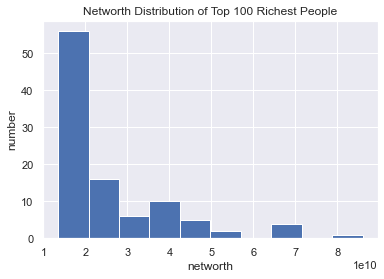

In [57]:
plt.hist(networth)
plt.title('Networth Distribution of Top 100 Richest People')
plt.xlabel('networth')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis.

You'll use this throughout this module, as well as the Data Science Group Project Module next semester.